<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_09/04_b_fashionmnist_mlp_mixer_convnext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load and Preprocess Fashion MNIST

In [1]:
import tensorflow as tf

# Load FashionMNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Convert to RGB and resize to 96x96
def preprocess(x):
    x = tf.expand_dims(x, -1)
    x = tf.image.resize(x, [96, 96])
    x = tf.image.grayscale_to_rgb(x)
    x = tf.cast(x, tf.float32) / 255.0
    return x

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(lambda x, y: (preprocess(x), y)).shuffle(1000).batch(16).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(lambda x, y: (preprocess(x), y)).batch(16).prefetch(tf.data.AUTOTUNE)


## Step 2: Build Classifier using MLP-Mixer

In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, pooling='avg', weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Step 3: Train & Evaluate

In [3]:
history = model.fit(train_ds, validation_data=test_ds, epochs=3)
loss, acc = model.evaluate(test_ds)
print(f"Accuracy: {acc:.2%}")

Epoch 1/3
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 540s 142ms/step - accuracy: 0.8040 - loss: 0.5624 - val_accuracy: 0.8786 - val_loss: 0.3296
Epoch 2/3
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 527s 140ms/step - accuracy: 0.8733 - loss: 0.3501 - val_accuracy: 0.8841 - val_loss: 0.3259
Epoch 3/3
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 539s 144ms/step - accuracy: 0.8796 - loss: 0.3275 - val_accuracy: 0.8882 - val_loss: 0.3039
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.8886 - loss: 0.3025
Accuracy: 88.82%


## Step 4: Visualize Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


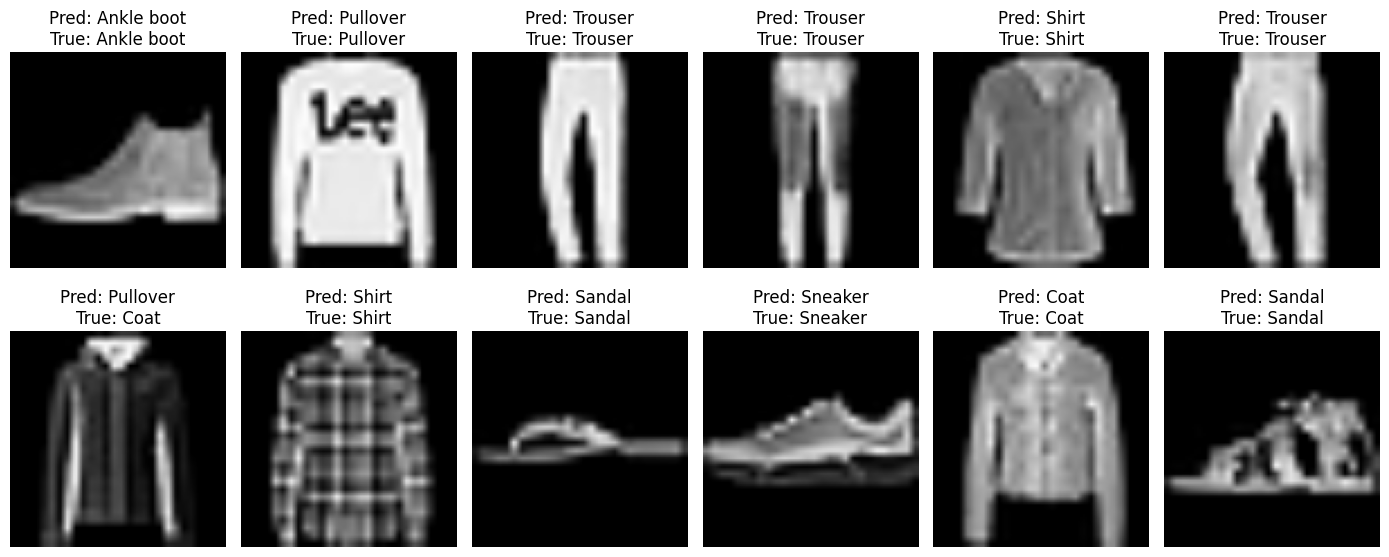

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf

# FashionMNIST class labels
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Get batch from test dataset
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    pred_labels = tf.argmax(predictions, axis=1)
    break

# Plot predicted vs actual
plt.figure(figsize=(14, 6))
rows, cols = 2, 6
for i in range(min(len(images), rows * cols)):
    plt.subplot(rows, cols, i + 1)
    img = (images[i].numpy() * 255).astype("uint8")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[labels[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
